# Background Subtraction - Thay đổi Background

Bài tập xử lý ảnh: Tách đối tượng khỏi background và thay thế bằng background mới

## Cài đặt thư viện (nếu cần)
Chạy cell dưới nếu chưa cài opencv-python và matplotlib

In [12]:
# Cài đặt thư viện cần thiết (chỉ chạy 1 lần)
# Bỏ comment dòng dưới nếu cần cài
# !pip install opencv-python matplotlib numpy

## Import thư viện

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("✅ Import thành công!")

✅ Import thành công!


In [14]:
## Bước 1: Tính sự khác biệt giữa background và ảnh có đối tượng

In [15]:
def computeDifference(bg_img, input_img):
  # Chuyển sang grayscale
  bg_gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)
  input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
  
  # Tính sự khác biệt giữa 2 ảnh
  difference_single_channel = cv2.absdiff(bg_gray, input_gray)
  
  return difference_single_channel

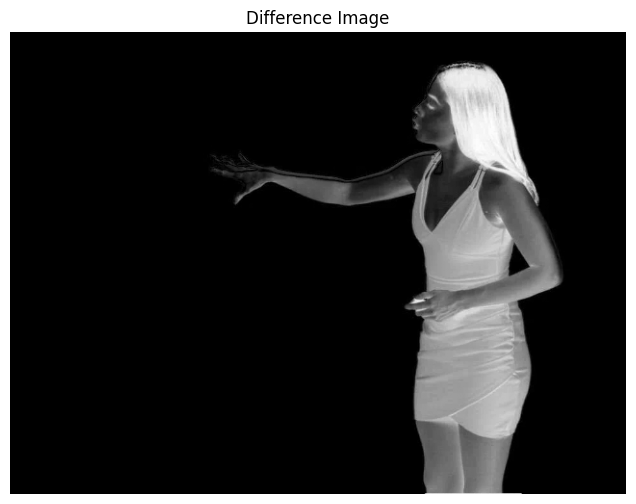

In [16]:
bg1_image = cv2.imread('Dataset/background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('Dataset/StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

difference_single_channel = computeDifference(bg1_image, ob_image)

plt.figure(figsize=(8, 6))
plt.imshow(difference_single_channel, cmap='gray')
plt.title('Difference Image')
plt.axis('off')
plt.show()

In [17]:
## Bước 2: Tạo Binary Mask (mặt nạ nhị phân)

In [18]:
def computeBinaryMask(difference_single_channel):
  # Áp dụng threshold để tạo binary mask
  # Pixel > 30 -> 255 (trắng - đối tượng)
  # Pixel <= 30 -> 0 (đen - background)
  _, difference_binary = cv2.threshold(difference_single_channel, 30, 255, cv2.THRESH_BINARY)
  
  return difference_binary

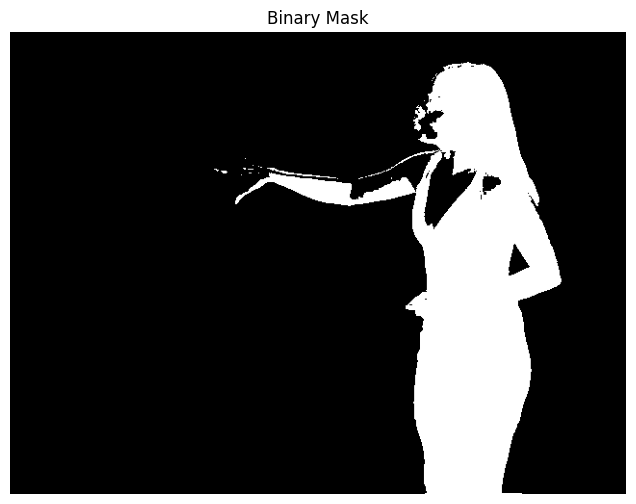

In [19]:
bg1_image = cv2.imread('Dataset/background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('Dataset/StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

difference_single_channel = computeDifference(bg1_image, ob_image)

binary_mask = computeBinaryMask(difference_single_channel)

plt.figure(figsize=(8, 6))
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [20]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
  difference_single_channel = computeDifference(bg1_image, ob_image)
  binary_mask = computeBinaryMask(difference_single_channel)
  
  # Mở rộng binary_mask từ 2D (grayscale) thành 3D (RGB)
  binary_mask_3ch = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
  
  # Thay thế background
  output = np.where(binary_mask_3ch == 255, ob_image, bg2_image)
  return output

## Bước 3: Thay thế Background

C:\Users\Duy Toan\AppData\Local\Temp\ipykernel_21636\2637522656.py:33: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Duy Toan\Python\DUT AI Club\Homework\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Duy Toan\Python\DUT AI Club\Homework\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


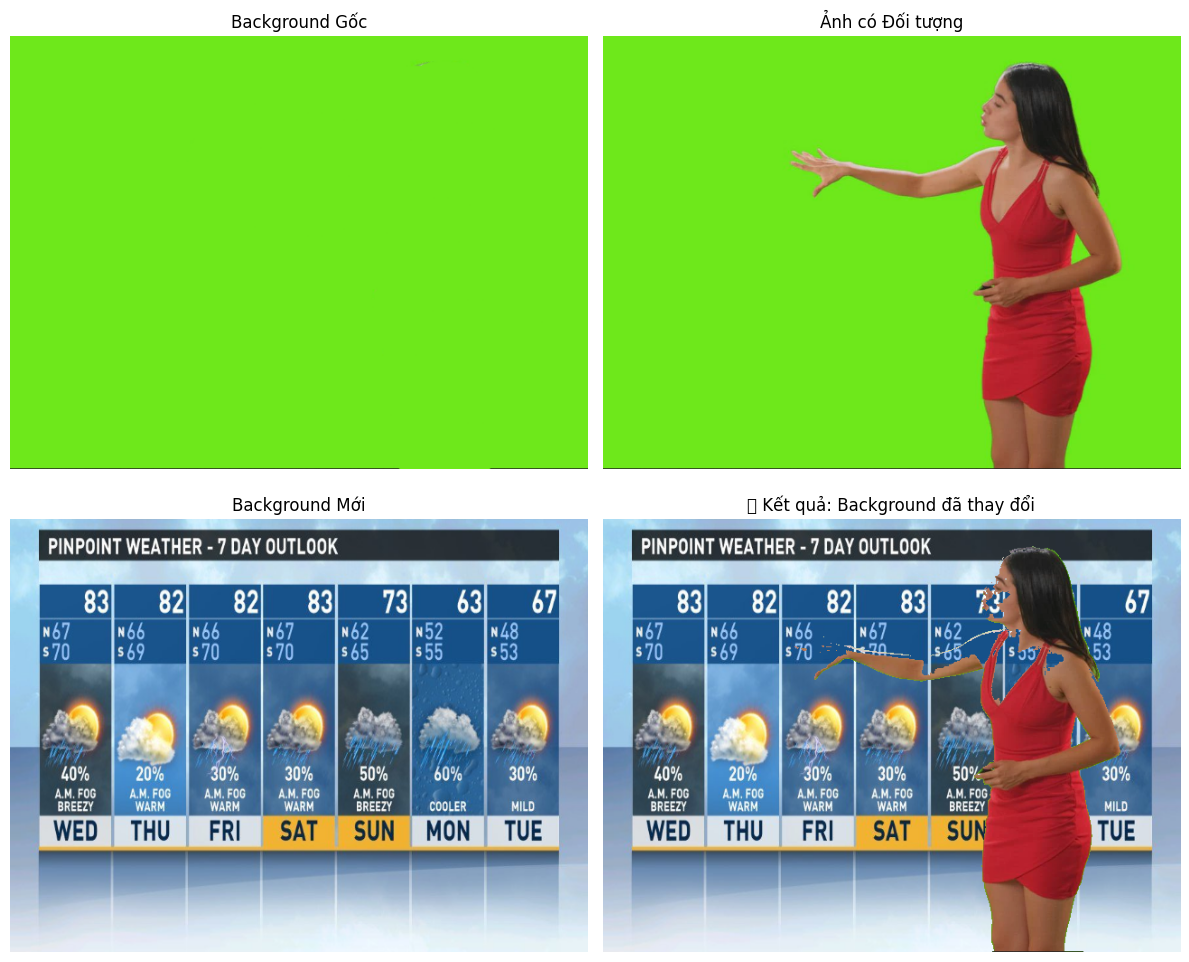

✅ Hoàn thành thay đổi background!


In [21]:
# Đọc và resize ảnh
bg1_image = cv2.imread('Dataset/background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('Dataset/StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

bg2_image = cv2.imread('Dataset/FakeBackground.png')
bg2_image = cv2.resize(bg2_image, (640, 480))

# Thay thế background
output = replaceBackGround(bg1_image, bg2_image, ob_image)

# Hiển thị kết quả
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(bg1_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Background Gốc')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Ảnh có Đối tượng')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(bg2_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Background Mới')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('🎯 Kết quả: Background đã thay đổi')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Hoàn thành thay đổi background!")